In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math

In [2]:
%matplotlib inline

# Background

A familiar logic problem consists of offering a choice between a seemingly large value compared to a small value that undergoes exponential growth over a period of time.  The problem is often constructed in the form: "choose between being given $\$$1,000,0000 at present or $\$$0.01 that doubles every day for 30 days".  The large number seems incredible in comparison to a penny which doubles every day.  However, it is difficult to estimate the impact of an exponential curve, especially beyond the first few days.

Provided below is the basic math equation for the compounding $\$$0.01 offer; in this problem $n$ represents the number of days and $v$ is the final value.

<center>$v=0.01*2^{(n-1)}$</center>

<center>$v=0.01*2^{(30-1)}=0.01*2^{29}=0.01*536870912=5368709.12$</center>
<br>
This formula can be reconstituted for an arbitrary starting values, in this case $b$.  This enables any starting value to be used.  In the code below, the exponential growth rate could also be changed.  This would mean that rather than doubling (i.e., the values are doubling) it could triple.  The formula below shows how to solve for the intersection point, $n$, between \$1,000,000 and a starting value, $b$.

<center>$v=b*2^{(n-1)}$</center>

<center>$v<=b*2^{(n-1)}$</center>

<center>$1000000<=b*2^{(n-1)}$</center>

<center>$log_2(1000000)<=log_2(b)+(n-1)$</center>

<center>$log_2(1000000)-log_2(b)<=n-1$</center>

<center>$n>=log_2(1000000)-log_2(b)+1$</center>

An further expansion of this concept would be to allow differnt compounding values.  So, rather than having a compounding value that doubles, the compounding value could be any positive, real integer.  The compounding value will be referred to as $c$; in the equations above, $c=2$.

# Functions

In [3]:
def get_number_days_exceed(val_amt_exceed=1e6,val_amt_start=0.01,val_amt_base=2,is_round_up=True):
    rtn_val = math.log(val_amt_exceed,val_amt_base)-math.log(val_amt_start,val_amt_base)+1
    if(is_round_up):
        rtn_val = math.ceil(rtn_val)
    return(rtn_val)

In [4]:
def get_doubled_total(val_amt_base=0.01,val_n=30):
    return(val_amt_base*2**(val_n-1))

# Data Structures

In [5]:
df = pd.DataFrame(list(range(30)),columns=['day'])
df['day'] = df['day']+1
#df.set_index('day',inplace=True)
df['amt_mil'] = 10**6
df['amt_pen'] = np.NaN
df['is_mil_pen_smaller'] = True
df['amt_qrt'] = np.NaN
df['is_mil_qrt_smaller'] = True
df['amt_dol'] = np.NaN
df['is_mil_dol_smaller'] = True
val_amt_pen = 0.01
val_amt_qrt = 0.25
val_amt_dol = 1.0
for i,row in df.iterrows():
    df.loc[i,'amt_pen'] = val_amt_pen
    df.loc[i,'is_mil_pen_smaller'] = df.loc[i,'amt_mil'] > df.loc[i,'amt_pen']
    if(i<25):
        df.loc[i,'amt_qrt'] = val_amt_qrt
        df.loc[i,'is_mil_qrt_smaller'] = df.loc[i,'amt_mil'] > df.loc[i,'amt_qrt']
        df.loc[i,'amt_dol'] = val_amt_dol
        df.loc[i,'is_mil_dol_smaller'] = df.loc[i,'amt_mil'] > df.loc[i,'amt_dol']
    else:
        df.loc[i,'amt_qrt'] = np.NaN
        df.loc[i,'amt_dol'] = np.NaN
    val_amt_pen = val_amt_pen*2
    val_amt_qrt = val_amt_qrt*2
    val_amt_dol = val_amt_dol*2
df

,day,amt_mil,amt_pen,is_mil_pen_smaller,amt_qrt,is_mil_qrt_smaller,amt_dol,is_mil_dol_smaller
0,1,1000000,0.01,True,0.25,True,1.0,True
1,2,1000000,0.02,True,0.50,True,2.0,True
2,3,1000000,0.04,True,1.00,True,4.0,True
3,4,1000000,0.08,True,2.00,True,8.0,True
4,5,1000000,0.16,True,4.00,True,16.0,True
5,6,1000000,0.32,True,8.00,True,32.0,True
6,7,1000000,0.64,True,16.00,True,64.0,True
7,8,1000000,1.28,True,32.00,True,128.0,True
8,9,1000000,2.56,True,64.00,True,256.0,True
9,10,1000000,5.12,True,128.00,True,512.0,True


# Comparison Plot

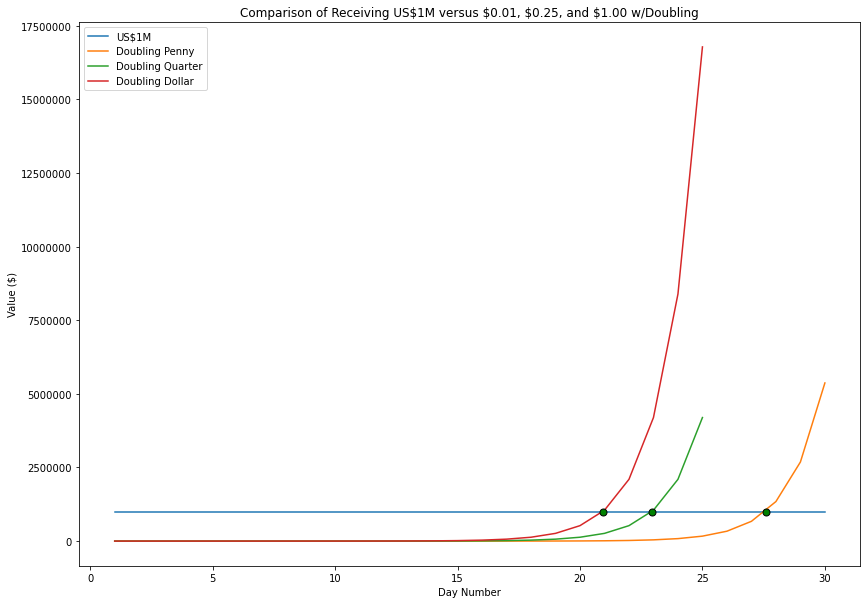

In [6]:
fig,ax = plt.subplots(figsize=(14,10))
ax.plot(df['day'],df['amt_mil'])
ax.plot(df['day'],df['amt_pen'])
ax.plot(df['day'],df['amt_qrt'])
ax.plot(df['day'],df['amt_dol'])
ax.set_ylabel('Value ($)')
ax.set_xlabel('Day Number')
ax.set_title('Comparison of Receiving US\$1M versus \$0.01, \$0.25, and \$1.00 w/Doubling')
ax.ticklabel_format(style='plain')
plt.legend(['US$1M','Doubling Penny','Doubling Quarter','Doubling Dollar'],loc='upper left')
plt.plot(get_number_days_exceed(val_amt_exceed=1e6,val_amt_start=0.01,val_amt_base=2,is_round_up=False),1e6,markeredgecolor='black',markerfacecolor='green',marker="o",markersize=7)
plt.plot(get_number_days_exceed(val_amt_exceed=1e6,val_amt_start=0.25,val_amt_base=2,is_round_up=False),1e6,markeredgecolor='black',markerfacecolor='green',marker="o",markersize=7)
plt.plot(get_number_days_exceed(val_amt_exceed=1e6,val_amt_start=1.,val_amt_base=2,is_round_up=False),1e6,markeredgecolor='black',markerfacecolor='green',marker="o",markersize=7)
plt.show()

# Random Amounts
## Total Values

In [7]:
vec_days = [5,10,20,25,30]
vec_amts = [0.01,0.02,0.25,1.,5.]
for i,amt in enumerate(vec_amts):
    for j,day in enumerate(vec_days):
        tmp_val = get_doubled_total(val_amt_base=amt,val_n=day)
        print(f'- Having ${amt:,.2f} double every day (after the first) for {day} days results in a total value of ${tmp_val:,.2f}')
    print('')

- Having $0.01 double every day (after the first) for 5 days results in a total value of $0.16
- Having $0.01 double every day (after the first) for 10 days results in a total value of $5.12
- Having $0.01 double every day (after the first) for 20 days results in a total value of $5,242.88
- Having $0.01 double every day (after the first) for 25 days results in a total value of $167,772.16
- Having $0.01 double every day (after the first) for 30 days results in a total value of $5,368,709.12

- Having $0.02 double every day (after the first) for 5 days results in a total value of $0.32
- Having $0.02 double every day (after the first) for 10 days results in a total value of $10.24
- Having $0.02 double every day (after the first) for 20 days results in a total value of $10,485.76
- Having $0.02 double every day (after the first) for 25 days results in a total value of $335,544.32
- Having $0.02 double every day (after the first) for 30 days results in a total value of $10,737,418.24

-

## Intersections

It is worthwhile to note that the word compound refers to how the values compound after each iteration (i.e., day).  The compounding value was previously referred to as $c$.  For instance:
- To have values double, the compounding value would be $c=2$;
- To have values triple, the compounding value would be $c=3$;
- To have values quadruple, the compounding value would be $c=4$.

In [8]:
vec_compound = [2,3,4,5]
val_amt_exceed = 1e6
for i,compound in enumerate(vec_compound):
    for j,amt in enumerate(vec_amts):
        tmp_val = get_number_days_exceed(val_amt_exceed=val_amt_exceed,val_amt_start=amt,val_amt_base=compound,is_round_up=False)
        print(f'- Having ${amt:,.2f} with a compounding value of {compound} reaches ${val_amt_exceed:,.2f} more than {tmp_val:,.2f} days')
    print('')

- Having $0.01 with a compounding value of 2 reaches $1,000,000.00 more than 27.58 days
- Having $0.02 with a compounding value of 2 reaches $1,000,000.00 more than 26.58 days
- Having $0.25 with a compounding value of 2 reaches $1,000,000.00 more than 22.93 days
- Having $1.00 with a compounding value of 2 reaches $1,000,000.00 more than 20.93 days
- Having $5.00 with a compounding value of 2 reaches $1,000,000.00 more than 18.61 days

- Having $0.01 with a compounding value of 3 reaches $1,000,000.00 more than 17.77 days
- Having $0.02 with a compounding value of 3 reaches $1,000,000.00 more than 17.14 days
- Having $0.25 with a compounding value of 3 reaches $1,000,000.00 more than 14.84 days
- Having $1.00 with a compounding value of 3 reaches $1,000,000.00 more than 13.58 days
- Having $5.00 with a compounding value of 3 reaches $1,000,000.00 more than 12.11 days

- Having $0.01 with a compounding value of 4 reaches $1,000,000.00 more than 14.29 days
- Having $0.02 with a compound

# Curious Question
So, a curious individual might ask: "if I have $\$$1,000,000 for 30 days, couldn't I invest that money in something to build earnings?"  Sure.  However, the question becomes what would the daily rate of return need to be to equal the value of doubling the initial amount of $\$$0.01 after 30 days?  In other words, to have $\$$1,000,000 for 30 days invested equal $\$$5,368,709.12 ($\$$0.01 doubling every day for 30 days), the calculated daily rate of return as a percentage is provided below as 5.76\% (approximately).  It is interesting to look at the NYSE daily rate of return


In [9]:
val_compund_amt = 100*(((get_doubled_total(val_amt_base=0.01,val_n=30)/val_amt_exceed)**(1/30))-1)
print('{:.2f}%'.format(val_compund_amt),'per day...')

5.76% per day...


In [10]:
%%time
df_nyse = pd.read_excel('./nyse_open_close_five_year.xlsx')
print(df_nyse.shape)
df_nyse.sort_values(by='Date',ascending=True,inplace=True)
df_nyse.reset_index(drop=True,inplace=True)
df_nyse['open_30'] = df_nyse['Open'].shift(periods=30)
df_nyse['ror_daily'] = 100*((df_nyse['Adj Close']-df_nyse['Open'])/df_nyse['Open'])
df_nyse['ror_daily_sma_30'] = df_nyse['ror_daily'].rolling(window=30).mean()
df_nyse['ror_30'] = 100*((df_nyse['Adj Close']-df_nyse['open_30'])/df_nyse['open_30'])
#df_nyse['ror_30_sma_30'] = df_nyse['ror_30'].rolling(window=30).mean()
df_nyse.head()

(1259, 7)
CPU times: user 357 ms, sys: 60.2 ms, total: 417 ms
Wall time: 455 ms


,Date,Open,High,Low,Close,Adj Close,Volume,open_30,ror_daily,ror_daily_sma_30,ror_30
0,2017-07-17,11894.69,11910.85,11882.36,11890.51,11890.51,2793170000,NaN,-0.035142,NaN,NaN
1,2017-07-18,11878.77,11879.97,11843.82,11877.42,11877.42,2962130000,NaN,-0.011365,NaN,NaN
2,2017-07-19,11894.34,11941.38,11893.42,11941.34,11941.34,3059760000,NaN,0.395146,NaN,NaN
3,2017-07-20,11956.27,11963.55,11928.67,11944.49,11944.49,3182780000,NaN,-0.098526,NaN,NaN
4,2017-07-21,11944.50,11944.50,11890.59,11924.60,11924.60,3059570000,NaN,-0.166604,NaN,NaN


In [11]:
df_nyse.loc[df_nyse['ror_30']>val_compund_amt]

,Date,Open,High,Low,Close,Adj Close,Volume,open_30,ror_daily,ror_daily_sma_30,ror_30
119,2018-01-04,12999.53,13045.16,12999.53,13028.46,13028.46,3695260000,12306.66,0.222547,0.034294,5.865117
120,2018-01-05,13066.37,13104.52,13039.08,13103.23,13103.23,3236620000,12352.57,0.282098,0.034706,6.076954
124,2018-01-11,13106.60,13210.77,13106.60,13210.77,13210.77,3641320000,12412.15,0.794790,0.048289,6.434179
125,2018-01-12,13240.96,13299.19,13237.55,13294.32,13294.32,3573970000,12529.55,0.402992,0.053270,6.103731
129,2018-01-19,13342.96,13384.46,13331.70,13384.46,13384.46,3639430000,12635.72,0.311025,0.079486,5.925582
...,...,...,...,...,...,...,...,...,...,...,...
1091,2021-11-12,17220.41,17312.94,17220.41,17297.66,17297.66,2865790000,16144.92,0.448596,0.194985,7.139955
1092,2021-11-15,17297.66,17336.84,17267.89,17285.55,17285.55,2618980000,16323.74,-0.070009,0.218213,5.892093
1093,2021-11-16,17285.55,17364.31,17285.55,17302.79,17302.79,2838210000,16198.56,0.099736,0.195089,6.816841
1134,2022-01-14,17259.02,17259.02,17056.67,17219.06,17219.06,3483530000,16133.89,-0.231531,0.150536,6.726028


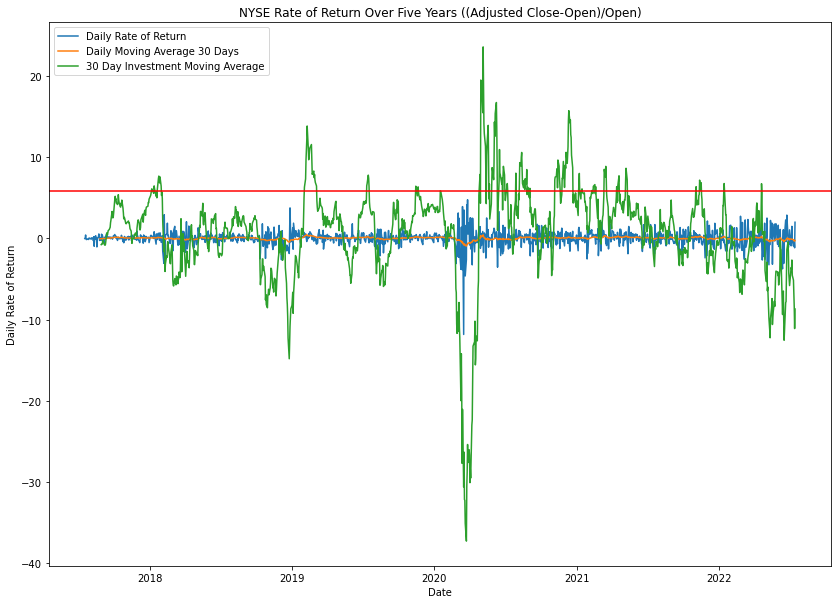

In [12]:
fig,ax = plt.subplots(figsize=(14,10))
ax.plot(df_nyse['Date'],df_nyse['ror_daily'])
ax.plot(df_nyse['Date'],df_nyse['ror_daily_sma_30'])
ax.plot(df_nyse['Date'],df_nyse['ror_30'])
ax.axhline(y=val_compund_amt,color='r',linestyle='-')
ax.set_ylabel('Daily Rate of Return')
ax.set_xlabel('Date')
ax.set_title('NYSE Rate of Return Over Five Years ((Adjusted Close-Open)/Open)')
plt.legend(['Daily Rate of Return','Daily Moving Average 30 Days','30 Day Investment Moving Average'],loc='upper left')
plt.show()